In [1]:
import os
import numpy as np
import pandas as pd
import healpy as hp

In [2]:
from emgw_filters import SpatialLocation, example_data

In [3]:
%matplotlib inline

In [4]:
fname = os.path.join(example_data, 'LALInference1.fits.gz,0')

In [5]:
sl = SpatialLocation(merger_times=None, spatial_fits_files=[fname])

In [6]:
_ = sl.get_skyprobs(fname)

NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


In [7]:
sl.times

array([2458600.14022406])

### Use from a csv file

In [8]:
vals_to_check = pd.read_csv(os.path.join(example_data, 'gcn.csv'), sep='|')

In [9]:
vals_to_check.head()

,name,ra,dec
0,ZTF19aasmppj,310.891261,65.544399
1,ZTF19aasmftm,325.900448,77.831563
2,ZTF19aaslsql,294.838466,60.690997
3,ZTF19aaslsvx,304.535732,58.315850
4,ZTF19aaslvwn,299.059846,46.463559


In [10]:
vals_to_check['in'] = sl.check_candidate_in(vals_to_check.ra, vals_to_check.dec, 512, sl.sky_pix[0])

NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


We know that this had a localization area of about a thousand square degrees. Sanity check:

In [11]:
len(sl.sky_pix[0]) / hp.nside2npix(512) * 40000

1096.204121907552

In [12]:
# If needed, write out the localization file to csv
#vals_to_check.to_csv('test_localization.csv', index=False)

### Do a single one by hand

let us say we have a single candidate we want to check by hand. Let us choose that to be the first in the previous 
csv file. We know that the answer should be that it is in.

In [13]:
vals_to_check.head()

,name,ra,dec,in
0,ZTF19aasmppj,310.891261,65.544399,True
1,ZTF19aasmftm,325.900448,77.831563,True
2,ZTF19aaslsql,294.838466,60.690997,True
3,ZTF19aaslsvx,304.535732,58.315850,True
4,ZTF19aaslvwn,299.059846,46.463559,True


In [14]:
sl.check_candidate_in(310.89, 65.544399, 512, sl.sky_pix[0])

['True']

So yes, that is in the region

### Visualization 

Show the region of the sky being included in the localization

In [15]:
sl.sky_probs[0].head()

,prob,cumulative_prob,in_pixels
hid,,,
0,0.000023,0.699795,1
1,0.000016,0.492991,1
2,0.000015,0.471663,1
3,0.000024,0.716424,1
4,0.000023,0.699748,1


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


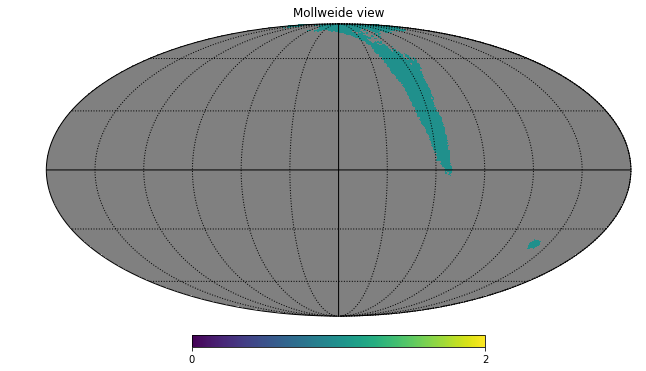

In [16]:
ipix = np.ones(hp.nside2npix(sl.nside[0]))*hp.UNSEEN
ipix[sl.sky_probs[0].query('in_pixels ==1').reset_index()['hid'].values] = 1
hp.mollview(ipix, flip='astro')
hp.graticule()